In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline

#import pandas to import csv file
import pandas as pd

In [2]:
f1=pd.read_csv(r'C:\Users\HP-PC\Desktop\GUC\Semester 10\Machine Learning\Assignments\PracticalAssig\house_prices_data_training_data.csv')
f2=pd.read_csv(r'C:\Users\HP-PC\Desktop\GUC\Semester 10\Machine Learning\Assignments\PracticalAssig\house_data_complete.csv')

f1=f1.dropna()
f2=f2.dropna()

f1=f1.drop(['id','date','zipcode', 'lat','long' ], axis=1)
f2=f2.drop(['id','date','zipcode', 'lat','long' ], axis=1)

In [3]:
data_training=f1.values
xx_training=data_training[:,1:]
yy_training=f1['price']  

data_complete=f2.values
xx_complete=data_complete[:,1:]
yy_complete=f2['price']

size=np.subtract(data_complete.shape[0],data_training.shape[0])
halfsize=int(np.round(size/2))

data_cv = data_complete[18000:(18000+halfsize),:]
xx_cv=data_cv[:,1:]
yy_cv=data_cv[:,0]

data_test = data_complete[(18000+halfsize):(18000+size),:]
xx_test=data_test[:,1:]
yy_test=data_test[:,0]



#prices = pd.DataFrame(f1, columns= ['price']) bygeb el col kollo b title
bedrooms=f1['bedrooms']#,'bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above']
floors=f1['floors']
grade=f1['grade']

Text(0, 0.5, 'Price')

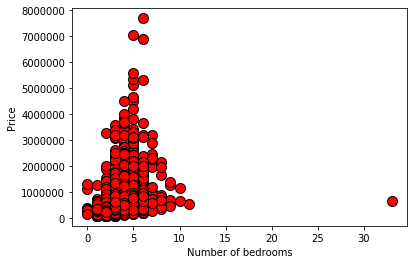

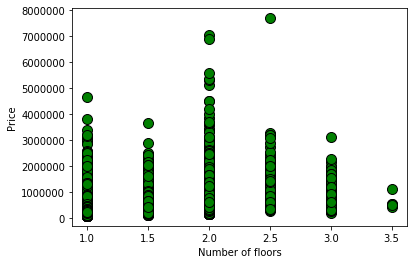

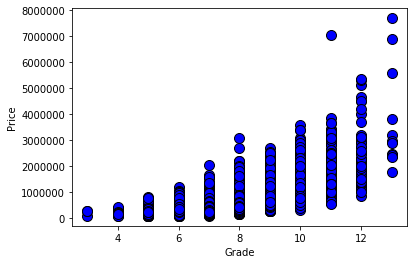

In [4]:
pyplot.plot(bedrooms, yy_training, 'ro', ms=10, mec='k')
pyplot.xlabel('Number of bedrooms')
pyplot.ylabel('Price')
pyplot.figure()
pyplot.plot(floors,yy_training,'go',ms=10,mec='k')
pyplot.xlabel('Number of floors')
pyplot.ylabel('Price')
pyplot.figure()
pyplot.plot(grade,yy_training,'bo',ms=10,mec='k')
pyplot.xlabel('Grade')
pyplot.ylabel('Price')

In [5]:
def  featureNormalize(X):
    # You need to set these values correctly
    X_norm = X.copy()
    mm=X.shape[0]
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    # =========================== YOUR CODE HERE =====================
    for i in range(0,X.shape[1]):
        mu[i]=np.mean(X[:,i])
        sigma[i]=np.std(X[:,i])
    
    X_norm=(X_norm-mu)/sigma
    X_norm=np.concatenate([np.ones((mm, 1)), X_norm], axis=1)
    # ================================================================
    return X_norm, mu, sigma

In [6]:
#Hypothesis1
xx_training1,mu_training1,sigma_training1=featureNormalize(xx_training)
xx_cv1,mu_cv1,sigma_cv1=featureNormalize(xx_cv)
xx_test1,mu_test1,sigma_test1=featureNormalize(xx_test)
theta1=np.ones(xx_training1.shape[1], dtype=int)

#Hpothesis2
xx_training2,mu_training2,sigma_training2=featureNormalize(np.power(xx_training,2))
xx_cv2,mu_cv2,sigma_cv2=featureNormalize(np.power(xx_cv,2))
xx_test2,mu_test2,sigma_test2=featureNormalize(np.power(xx_test,2))

#Hypothesis3
xx_training3=np.concatenate((xx_training,np.power(xx_training,2)),axis=1)
xx_training3,mu_training3,sigma_training3=featureNormalize(xx_training3)

xx_cv3=np.concatenate((xx_cv,np.power(xx_cv,2)),axis=1)
xx_cv3,mu_cv3,sigma_cv3=featureNormalize(xx_cv3)

xx_test3=np.concatenate((xx_test,np.power(xx_test,2)),axis=1)
xx_test3,mu_test3,sigma_test3=featureNormalize(xx_test3)
theta3=np.ones(xx_training3.shape[1], dtype=int)


#X for each hypothesis
xh1=np.array([xx_training1, xx_cv1, xx_test1])
xh2=np.array([xx_training2, xx_cv2, xx_test2])
xh3=np.array([xx_training3, xx_cv3, xx_test3])

yy=np.array([yy_training,yy_cv,yy_test])


In [7]:
def computeCostMulti(X, y, theta,lmbda):
    J = 0
    h= []
    m=y.size
    for i in range(0,m):
        h.append(np.dot(theta.T,X[i]))
        #print(h)
        J=J+(h[i]-y[i])**2
            
    J=np.divide(J,2*m) + np.dot((lmbda/2*m),sum(np.power(theta,2)))
    
    return J

In [8]:
def gradientDescentMulti(X, y, theta, alpha, num_iters,lmbda):
   
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        sumofh0x=np.dot(X,theta)
        #theta=theta-((alpha/m)*(np.dot(X.T,sumofh0x-y)))
        
        
        theta=theta*(1-alpha*lmbda/m)-((alpha/m)*(np.dot(X.T,sumofh0x-y)))
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta,lmbda))
    
    return theta, J_history


In [9]:
lmbdaarray=np.array([0,1.5 ,4.5,7, 10,15,20])

def Project(x,y,theta,alpha,iterations):
    x_training=x[0]
    x_cv=x[1]
    x_test=x[2]
    
    y_training=y[0]
    y_cv=y[1]
    y_test=y[2]
        
    J_cv=np.zeros(lmbdaarray.shape[0])
    t1=np.zeros((lmbdaarray.shape[0],theta.size))
    J_history1=np.zeros((lmbdaarray.shape[0],iterations))


    for i in range(lmbdaarray.shape[0]):
        t1[i,:],J_history1[i,:]=gradientDescentMulti(x_training,y_training,theta,alpha,iterations,lmbdaarray[i])
        print(t1)
        J_cv[i]=computeCostMulti(x_cv,y_cv,t1[i],0)

    pyplot.figure()
    pyplot.plot(np.arange(len(J_history1[np.argmin(J_cv)])),J_history1[np.argmin(J_cv)], lw=2)
    pyplot.xlabel('Number of iterations')
    pyplot.ylabel('Cost J')
    
    lmbdaofminJ=lmbdaarray[np.argmin(J_cv)]

    price1test=np.dot(t1[np.argmin(J_cv)],x_test.T)
    Error_test1=(1/(2*y_test.size))*np.sum(np.power((price1test-y_test),2))
    print("Error=", Error_test1)
    
    return J_cv,lmbdaofminJ,Error_test1, J_history1


[[ 533060.091176    -34157.60545134   32382.72679924   74877.42815555
     1721.21466577    8049.65093843   51207.25056062   32775.22863165
    15191.5446546   124176.71472947   64897.30008119   34098.7648238
  -103710.80883532    5996.96038242   34940.67583309  -16709.15482563]
 [      0.               0.               0.               0.
        0.               0.               0.               0.
        0.               0.               0.               0.
        0.               0.               0.               0.        ]
 [      0.               0.               0.               0.
        0.               0.               0.               0.
        0.               0.               0.               0.
        0.               0.               0.               0.        ]
 [      0.               0.               0.               0.
        0.               0.               0.               0.
        0.               0.               0.               0.
        0.          

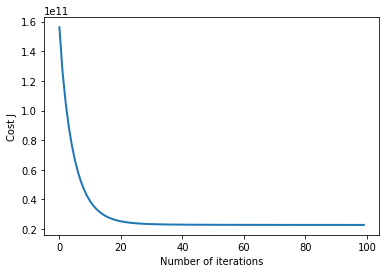

In [10]:
alpha1=0.1
iterations1=100
JJ_CV1,lmin1,err1,J_his1=Project(xh1,yy,theta1,alpha1,iterations1)

print(JJ_CV1)
print(lmin1)

[[533060.091176    -8319.31217807  40943.7728193   82640.45697213
    2604.5835846   16415.92528217  44450.33443598  32677.2253603
   19236.569079   133187.60968778  27579.72292912  19026.53314526
  -96814.19961835   8556.8122942   39726.54674406  -9356.50997384]
 [     0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.        ]
 [     0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.        ]
 [     0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.        ]
 [     0.    

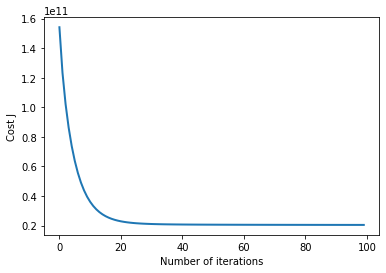

In [11]:
alpha2=0.1
iterations2=100
JJ_CV2,lmin2,err2,J_his2=Project(xh2,yy,theta1,alpha2,iterations2)
print(JJ_CV2)
print(lmin2)

[[ 5.33060091e+05 -2.66517560e+04 -3.61984303e+03  3.58499499e+02
  -9.09361498e+03  1.09705430e+02  2.32463742e+04  1.05209882e+04
   8.59251632e+03  5.68339879e+04 -8.37498786e+03  1.57293132e+04
  -4.82003379e+04  3.63733594e+03  1.51227093e+04 -1.91282682e+04
   8.60330983e+03  4.46257676e+04  8.42750252e+04  9.75326372e+03
   1.49163815e+04  2.32463742e+04  2.01999132e+04  1.07661272e+04
   7.85343599e+04  4.13368616e+04  7.56595909e+03 -4.77599458e+04
   4.62933586e+03  2.79544836e+04  7.57124346e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.0000

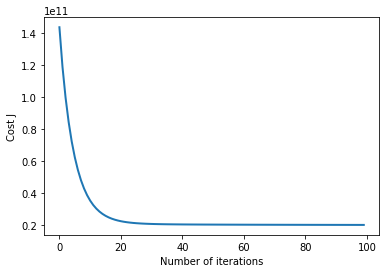

In [12]:
alpha3=0.1
iterations3=100
JJ_CV3,lmin3,err3,J_his3=Project(xh3,yy,theta3,alpha3,iterations3)
print(JJ_CV3)
print(lmin3)

In [13]:
print(J_his1)
print(J_his2)
print(J_his3)

[[1.56193744e+11 1.26515754e+11 1.05718695e+11 8.97471883e+10
  7.70704894e+10 6.68912964e+10 5.86799356e+10 5.20407127e+10
  4.66644502e+10 4.23055512e+10 3.87676044e+10 3.58929943e+10
  3.35549613e+10 3.16513923e+10 3.00999184e+10 2.88340217e+10
  2.77999322e+10 2.69541472e+10 2.62614439e+10 2.56932835e+10
  2.52265281e+10 2.48424071e+10 2.45256838e+10 2.42639835e+10
  2.40472495e+10 2.38673043e+10 2.37174945e+10 2.35924030e+10
  2.34876164e+10 2.33995361e+10 2.33252259e+10 2.32622875e+10
  2.32087605e+10 2.31630404e+10 2.31238127e+10 2.30899990e+10
  2.30607135e+10 2.30352272e+10 2.30129394e+10 2.29933542e+10
  2.29760612e+10 2.29607202e+10 2.29470484e+10 2.29348102e+10
  2.29238086e+10 2.29138787e+10 2.29048817e+10 2.28967007e+10
  2.28892365e+10 2.28824050e+10 2.28761343e+10 2.28703629e+10
  2.28650380e+10 2.28601137e+10 2.28555504e+10 2.28513137e+10
  2.28473732e+10 2.28437024e+10 2.28402778e+10 2.28370786e+10
  2.28340864e+10 2.28312847e+10 2.28286585e+10 2.28261947e+10
  2.2823

Text(0, 0.5, 'Cost J')

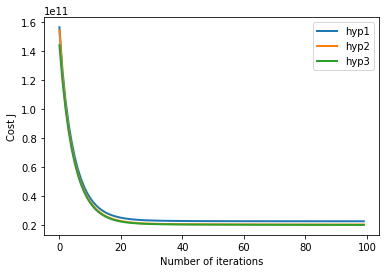

In [14]:
pyplot.figure()
pyplot.plot(np.arange(len(J_his1[0])),J_his1[0], lw=2)
pyplot.plot(np.arange(len(J_his2[0])),J_his2[0], lw=2)
pyplot.plot(np.arange(len(J_his3[0])),J_his3[0], lw=2)
pyplot.legend(['hyp1','hyp2','hyp3'])
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

In [16]:
print('Error of hypothesis 1=',err1)
print('Error of hypothesis 2=',err2)
print('Error of hyppthesis 3=',err3)

Error of hypothesis 1= 30946002258.295723
Error of hypothesis 2= 30160349487.46392
Error of hyppthesis 3= 29829311284.133293
